#Bài tập thực hành - Lập trình máy học cho python - CS116.M11



MSSV: 19521299

Tên: Nguyễn Chí Cường

Ngày: 9/11/2021

Tuần 10

#Load dataset

In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('X_train: ' + str(x_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(x_test.shape))
print('Y_test:  '  + str(y_test.shape))

11501568/11490434 [==============================] - 0s 0us/step
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


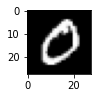

In [3]:
for i in range(3):  
  plt.subplot(330 + 1 + i)
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
  plt.show()

#Chuẩn hóa dữ liệu

In [4]:
from tensorflow.keras.utils import to_categorical
#one-hot encode label
y_train_oh = to_categorical(y_train)
y_test_oh = to_categorical(y_test)

In [5]:
x_train = x_train/255.0
x_test = x_test/255.0

#Build model

In [6]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import batch_normalization
from keras.layers import AveragePooling2D

In [7]:
num_classes = 10

model = Sequential()

model.add(Conv2D(8, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))

model.add(MaxPooling2D((2, 2),padding='same', strides=2))

model.add(Conv2D(8, (3, 3), activation='linear',padding='same'))
model.add(Conv2D(8, (3, 3), activation='linear',padding='same'))

model.add(Conv2D(16, (3, 3), activation='linear',padding='same', strides=2))
model.add(Conv2D(16, (3, 3), activation='linear',padding='same'))
model.add(Conv2D(16, (3, 3), activation='linear',padding='same'))

model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))

model.add(Flatten())
model.add(Dense(128, activation='linear'))                 
model.add(Dense(num_classes, activation='softmax'))

In [8]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         584       
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 8)         584       
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 16)          1168      
                                                                 
 conv2d_4 (Conv2D)           (None, 7, 7, 16)          2320      
                                                        

#Train model

In [10]:
batch_size = 32
epochs = 100

In [12]:
model.fit(x_train, y_train_oh, validation_split=0.2, batch_size=batch_size, epochs=epochs)

Epoch 1/100
1500/1500 [==============================] - 41s 7ms/step - loss: 0.3113 - accuracy: 0.9070 - val_loss: 0.1782 - val_accuracy: 0.9466
Epoch 2/100
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1613 - accuracy: 0.9502 - val_loss: 0.1316 - val_accuracy: 0.9619
Epoch 3/100
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1382 - accuracy: 0.9575 - val_loss: 0.1229 - val_accuracy: 0.9642
Epoch 4/100
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1193 - accuracy: 0.9629 - val_loss: 0.1375 - val_accuracy: 0.9616
Epoch 5/100
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1152 - accuracy: 0.9651 - val_loss: 0.1087 - val_accuracy: 0.9661
Epoch 6/100
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1075 - accuracy: 0.9669 - val_loss: 0.1236 - val_accuracy: 0.9622
Epoch 7/100
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1055 - accuracy: 0.9672 - val_loss: 0.1131 -

In [13]:
score = model.evaluate(x_test, y_test_oh, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.10235331952571869
Test accuracy: 0.9710000157356262
